In [1]:
from sklearn.datasets import load_iris
import pandas as pd
iris = load_iris()
df = pd.DataFrame(iris["data"], columns=iris["feature_names"])
df["target"] = iris["target"]
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [2]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(iris["data"],
                                                  iris["target"],
                                                  test_size=0.1)

In [3]:
from sklearn.cluster import KMeans
clu = KMeans(n_clusters=3)
clu.fit(x_train)

KMeans(n_clusters=3)

In [4]:
clu.labels_

array([1, 2, 0, 0, 1, 2, 0, 0, 0, 0, 0, 1, 2, 0, 2, 1, 1, 1, 0, 2, 0, 0,
       0, 1, 1, 2, 1, 2, 0, 1, 0, 1, 2, 1, 0, 1, 0, 0, 2, 1, 1, 2, 1, 2,
       2, 1, 2, 1, 0, 2, 2, 1, 1, 0, 1, 1, 2, 2, 1, 2, 2, 1, 1, 2, 1, 0,
       2, 1, 2, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       2, 0, 0, 1, 0, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 0, 1, 0,
       0, 1, 1, 2, 2, 1, 2, 1, 0, 1, 1, 1, 0, 0, 2, 1, 2, 1, 0, 1, 0, 0,
       1, 1, 0])

In [5]:
print("預測結果:", list(clu.predict(x_test)))
print("正確結果:", list(y_test))

from sklearn.metrics import accuracy_score
score = accuracy_score(clu.predict(x_test), y_test)
print("正確率:", score)

預測結果: [0, 1, 1, 2, 0, 2, 1, 0, 0, 1, 0, 0, 0, 2, 0]
正確結果: [0, 1, 1, 2, 0, 2, 1, 0, 0, 1, 0, 0, 0, 2, 0]
正確率: 1.0


In [6]:
from sklearn.metrics import silhouette_score
x = df.drop(["target"], axis=1)
plotx = []
ploty = []
for k in range(2, 6):
    clu = KMeans(n_clusters=k)
    clu.fit(x)
    s = silhouette_score(x, clu.labels_)
    plotx.append(k)
    ploty.append(s)
print("K值:",plotx)
print("Score:",ploty)

K值: [2, 3, 4, 5]
Score: [0.6810461692117462, 0.5528190123564095, 0.49805050499728737, 0.48874888709310566]


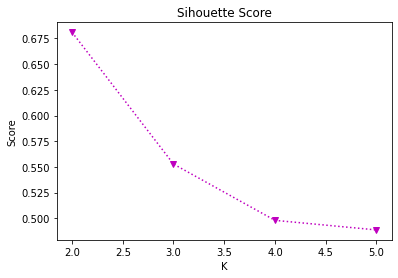

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline #只有jupyter notebook有效
plt.plot(plotx, ploty, "mv:")
plt.title("Sihouette Score")
plt.xlabel("K")
plt.ylabel("Score")
plt.show()